# Курсовой проект для курса "Python для Data Science"

#### Подключение библиотек и скриптов

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

### Функции

In [2]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

#### Пути к директориям и файлам

In [3]:
DATASET_PATH = 'train.csv'
PREPARED_DATASET_PATH = 'train_prepared.csv'

### Загрузка данных

#### Описание датасета:
* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [4]:
df=pd.read_csv(DATASET_PATH)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [5]:
df.shape

(10000, 20)

### Типы данных

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [7]:
df.select_dtypes(include=['int64'])
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


### Обзор количественных переменных

In [8]:
df_num_value=df.select_dtypes(include=['float64','int64'])
df_num_value.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


In [9]:
df_num_value.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Обзор номинативных переменных

In [10]:
df_str_value=df.select_dtypes(include='object')
df_str_value.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [11]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [12]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [13]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [14]:
df[df_str_value.columns+'_bin']=(df[df_str_value.columns]=='A').astype('int64')

In [15]:
df['Shops_2_bin'].value_counts()

0    9175
1     825
Name: Shops_2_bin, dtype: int64

### Обработка незаполненых значений

In [16]:
len(df)-df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
Ecology_2_bin       0
Ecology_3_bin       0
Shops_2_bin         0
dtype: int64

### всего данных 10000 в признаке Healthcare_1 отсутствует 4798 данный признак отбразываем

In [17]:
df['Healthcare_1']=0

### признак LifeSquare содержит 2113 записей обобщим пропущенные записи

In [18]:
df.loc[df['LifeSquare'].isnull(),'LifeSquare']=df['LifeSquare'].median
len(df)-df.count() 

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
Ecology_2_bin    0
Ecology_3_bin    0
Shops_2_bin      0
dtype: int64

###  Анализ целевой переменной

In [19]:
df[df['Price'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin


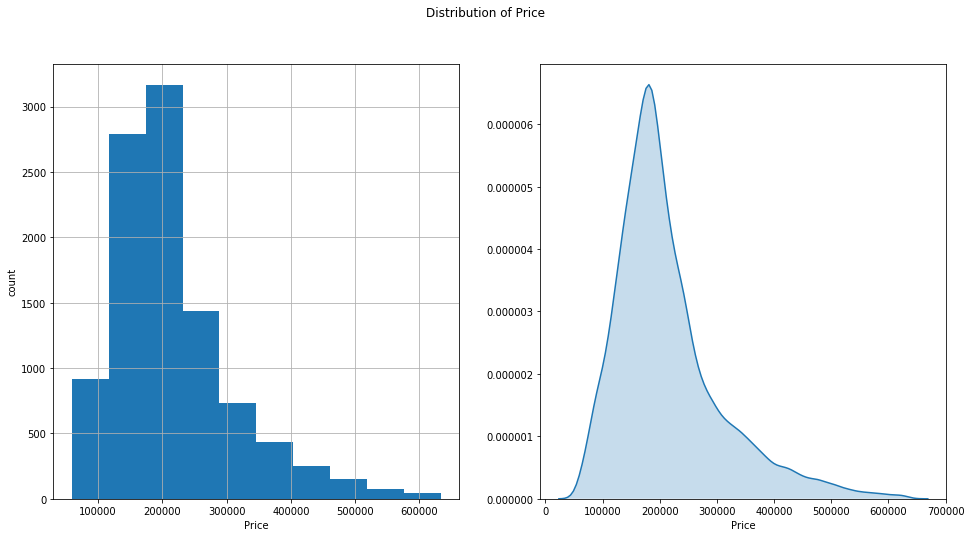

In [20]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist()
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [21]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()
target_mode = df['Price'].mode()[0]

target_mean, target_median, target_mode

(214138.86, 192269.64487934904, 59174.77802758122)

In [22]:
#plt.figure(figsize = (16, 8))

#sns.distplot(df['Price'])

#y = np.linspace(0, 0.000005, 100)
#plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
#plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
#plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

#plt.title('Distribution of Price')
#plt.legend()
#plt.show()

### Оценка распредения целевой переменной в разрезе других признаков

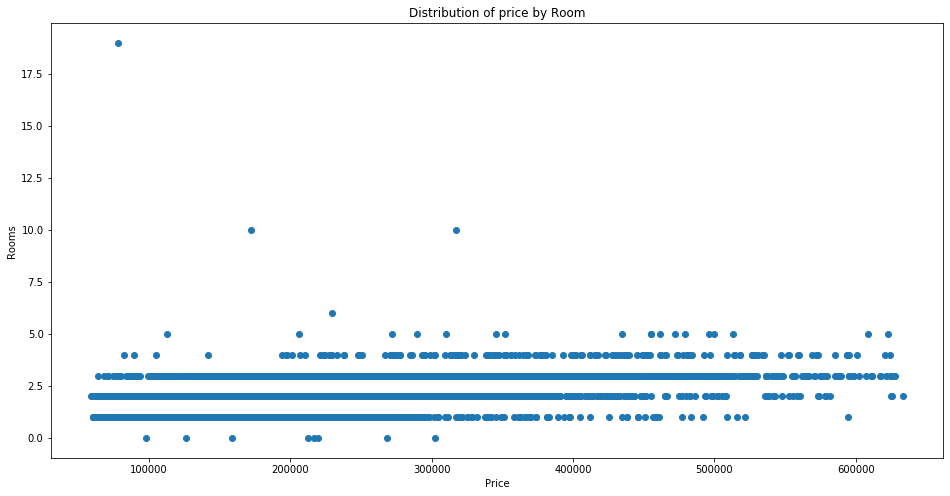

In [23]:
plt.figure(figsize=(16, 8))

plt.scatter(df['Price'], df['Rooms'])

plt.xlabel('Price')
plt.ylabel('Rooms')
plt.title('Distribution of price by Room')
plt.show()

In [ ]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['Price'], df['Shops_2_bin'])

plt.xlabel('Price')
plt.ylabel('Shops_2_bin')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

In [ ]:
df_num_features = df.select_dtypes(include='float64')

In [ ]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

In [ ]:
sns.pairplot(df_num_features);

In [ ]:
grid = sns.jointplot(df['total_rooms'], df['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

In [ ]:
df_num_value=df.select_dtypes(include=['float64','int64'])
df_num_value.drop('Id',1,inplace=True) ## Исключаем признак Id
df_num_value.info()

### Стандартизация признаков

In [68]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,14038,35,2.0,47.981561,29.4428,6.0,7,9.0,1969,0.089040,...,7976,5,0,0,11,B,184966.930730,0,0,0
1,15053,41,3.0,65.683640,40.0495,8.0,7,9.0,1978,0.000070,...,10309,1,0,1,16,B,300009.450063,0,0,0
2,4765,53,2.0,44.947953,29.1976,0.0,8,12.0,1968,0.049637,...,7759,0,0,1,3,B,220925.908524,0,0,0
3,5809,58,2.0,53.352981,52.7315,9.0,8,17.0,1977,0.437885,...,5735,3,0,0,5,B,175616.227217,0,0,0
4,10783,99,1.0,39.649192,23.7762,7.0,11,12.0,1976,0.012339,...,5776,1,0,2,4,B,150226.531644,0,0,0


In [69]:
target_name = 'Price' #LifeSquare
feature_names=['DistrictId','Rooms','Square','KitchenSquare','Floor','HouseFloor','HouseYear','Ecology_1','Social_2',
               'Social_3','Helthcare_2','Shops_1','Ecology_2_bin','Ecology_3_bin','Shops_2_bin']


In [70]:
df = df[feature_names+[target_name]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Ecology_2_bin    10000 non-null int64
Ecology_3_bin    10000 non-null int64
Shops_2_bin      10000 non-null int64
Price            10000 non-null float64
dtypes: float64(6), int64(10)
memory usage: 1.2 MB


In [71]:
feature_names_for_stand=feature_names
feature_names_for_stand

['DistrictId',
 'Rooms',
 'Square',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin']

In [75]:
matrix_cor=df.corr()
matrix_cor.style.background_gradient(cmap='coolwarm')

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Price
DistrictId,1,0.0714317,-0.0266126,0.040358,-0.120373,-0.149051,0.0134302,0.065294,0.167479,0.136095,0.306147,0.174214,0.0934062,0.0279019,0.0210178,0.2651
Rooms,0.0714317,1,0.662893,0.00512314,-0.000665145,-0.0293025,-0.0106118,-0.0323468,0.0713354,0.0128113,0.0635565,0.0536184,0.0019708,0.00590933,0.00014613,0.550291
Square,-0.0266126,0.662893,1,0.00831962,0.114791,0.0815046,-0.00903167,-0.0644791,-0.0431202,0.0352407,-0.0229598,0.0213575,-0.0299265,-0.0227485,0.0493804,0.520075
KitchenSquare,0.040358,0.00512314,0.00831962,1,-0.0113969,0.000780073,0.000958263,-0.0056218,0.037805,-0.0151404,0.0431698,0.0102156,-0.000268303,0.00791872,0.0173152,0.0288642
Floor,-0.120373,-0.000665145,0.114791,-0.0113969,1,0.418986,0.000927968,-0.016133,-0.0165596,-0.00223667,-0.0655365,0.0242643,-0.0496614,-0.0257672,0.013626,0.128715
HouseFloor,-0.149051,-0.0293025,0.0815046,0.000780073,0.418986,1,-0.000864152,-0.00436194,0.00719353,-0.00813714,-0.0687284,0.0262786,-0.0593472,-0.00925812,-0.0510022,0.0882798
HouseYear,0.0134302,-0.0106118,-0.00903167,0.000958263,0.000927968,-0.000864152,1,0.00146456,0.00196999,0.00081881,0.0112454,0.00368127,-0.000996947,-0.00168626,-0.00299383,0.00430539
Ecology_1,0.065294,-0.0323468,-0.0644791,-0.0056218,-0.016133,-0.00436194,0.00146456,1,0.00926363,-0.124068,0.0308729,-0.0767492,0.110725,0.223197,-0.0798085,-0.0583807
Social_2,0.167479,0.0713354,-0.0431202,0.037805,-0.0165596,0.00719353,0.00196999,0.00926363,1,0.073379,0.473193,0.559163,0.0127091,-0.00739405,-0.143777,0.239226
Social_3,0.136095,0.0128113,0.0352407,-0.0151404,-0.00223667,-0.00813714,0.00081881,-0.124068,0.073379,1,0.286434,0.662113,-0.00851169,-0.0145948,-0.0828096,0.0748778


In [28]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [30]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)
df.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Price
0,-0.353348,0.130439,-0.395780,-0.009569,-0.291306,-0.532703,-0.010081,-0.250529,0.654880,-0.127533,-0.883480,1.408356,-0.09897,-0.16816,-0.299864,184966.930730
1,-0.215687,1.321667,0.444867,0.060460,-0.291306,-0.532703,-0.010036,-0.998053,1.237169,-0.295384,-0.213923,2.448700,-0.09897,-0.16816,-0.299864,300009.450063
2,0.059635,0.130439,-0.539842,-0.219657,-0.100498,-0.089940,-0.010086,-0.581588,0.600720,-0.337347,-0.213923,-0.256195,-0.09897,-0.16816,-0.299864,220925.908524
3,0.174352,0.130439,-0.140699,0.095474,-0.100498,0.647998,-0.010041,2.680470,0.095553,-0.211458,-0.883480,0.159943,-0.09897,-0.16816,-0.299864,175616.227217
4,1.115034,-1.060788,-0.791473,0.025445,0.471924,-0.089940,-0.010046,-0.894969,0.105786,-0.295384,0.455633,-0.048126,-0.09897,-0.16816,-0.299864,150226.531644


In [43]:
high_corr=matrix_cor.loc[abs(matrix_cor['Price'])>0.5,'Price'].keys()
high_corr

Index(['Rooms', 'Square', 'Price'], dtype='object')

### Разбиение на train и test

In [206]:
X = df[feature_names]
y = df[target_name]

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

### Модель RandomForestRegressor

In [208]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

R2:	0.947
MAE:	12138.37
MSE:	452530431.58


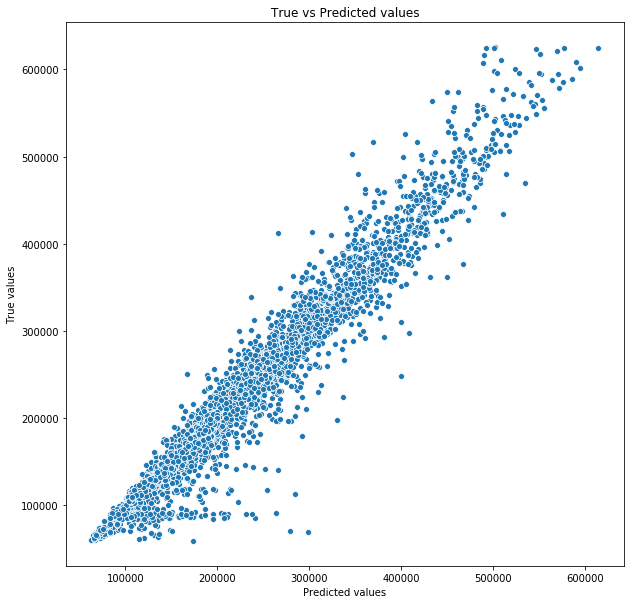

In [215]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.703
MAE:	30349.098
MSE:	2591656292.48


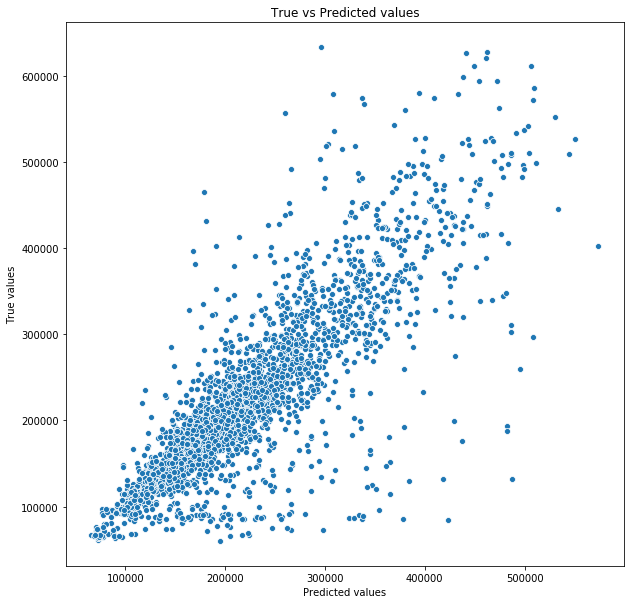

In [217]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

### проверка тестовых данных

In [291]:
df=pd.read_csv('test.csv')

In [293]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [281]:
df['Healthcare_1']=0

In [282]:
df_str_value=df.select_dtypes(include='object')
df[df_str_value.columns+'_bin']=(df[df_str_value.columns]=='A').astype('int64')

In [283]:
df = df[feature_names+[target_name]]

In [284]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [285]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)
df.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,Price
0,0.152140,0.107333,-0.343979,0.002332,-0.480057,0.206083,-0.667299,1.585280,-0.660397,-0.304366,-0.891612,-0.888194,-0.098453,-0.175258,-0.299666,0.0
1,0.514336,0.107333,0.671194,-0.500230,-0.480057,-1.708911,-0.398066,-0.367283,-0.986014,-0.220549,-0.891612,-0.469511,-0.098453,-0.175258,-0.299666,0.0
2,3.140252,-1.085258,-2.244616,0.605406,-1.209627,-1.119682,-4.059632,-0.998468,0.529306,3.299785,2.487242,0.158513,-0.098453,-0.175258,-0.299666,0.0
3,-0.096869,0.107333,0.869374,0.303869,2.438224,1.384540,1.217331,-0.149940,-0.204634,-0.220549,1.135700,-0.260169,-0.098453,-0.175258,-0.299666,0.0
4,-0.549613,-1.085258,-0.467364,-0.500230,1.526261,0.648004,1.755796,-0.397445,-1.186699,-0.304366,-0.891612,-0.888194,-0.098453,-0.175258,3.337053,0.0


In [286]:
y_test_preds = rf_model.predict(df[feature_names])

In [294]:
y_test_preds

array([379867.83479742, 243357.15479625, 321964.24539749, ...,
       334751.88332394, 244247.25828822, 249219.14106844])

In [295]:
df['Price']=y_test_preds

In [297]:
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B,379867.834797
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243357.154796
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B,321964.245397
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B,404174.662699
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A,153057.998918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B,237338.690413
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B,130144.010915
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B,334751.883324
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,244247.258288
